In [57]:

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [58]:
application_df = application_df.drop(columns = ['EIN', 'NAME'])
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [59]:
# Look at APPLICATION_TYPE value counts for binning
type_counts = application_df['APPLICATION_TYPE'].value_counts()
type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [60]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(type_counts.iloc[8:].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [61]:
# Look at CLASSIFICATION value counts for binning
classification_types = application_df['CLASSIFICATION'].value_counts()
classification_types

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [62]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_types.iloc[5:].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [63]:
dummies = pd.get_dummies(application_df)
dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


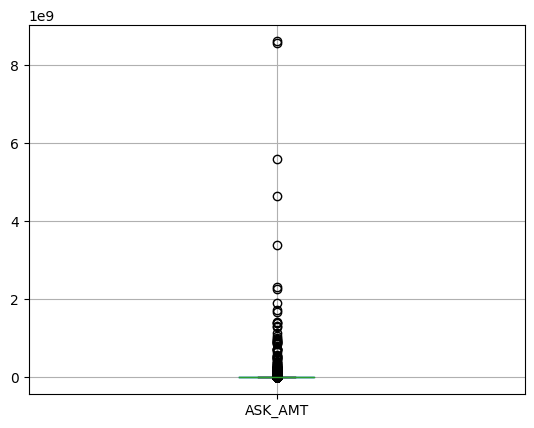

In [64]:

dummies.boxplot(column='ASK_AMT', return_type='axes');

<Axes: >

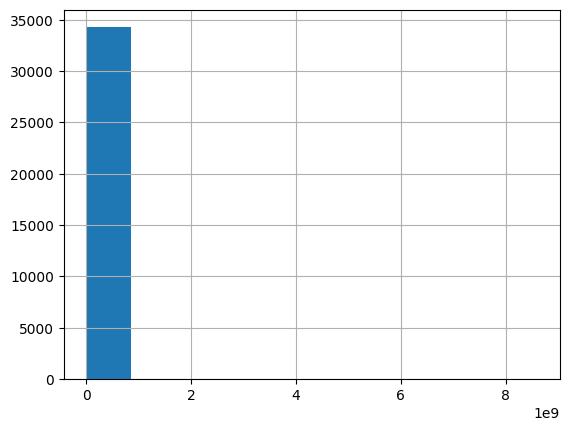

In [65]:
dummies['ASK_AMT'].hist()

In [66]:
dummies=dummies[dummies['ASK_AMT'] < 2000000000]

In [67]:
# Split our preprocessed data into our features and target arrays
y = dummies['IS_SUCCESSFUL'].values
X = dummies.drop(columns='IS_SUCCESSFUL').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [68]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [76]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_total = len(X_train[0])
hidden_nodes_layer1 = 30
hidden_nodes_layer2 = 15
hidden_nodes_layer3 = 8

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features_total, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation = "relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation = "relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 30)                1320      
                                                                 
 dense_37 (Dense)            (None, 15)                465       
                                                                 
 dense_38 (Dense)            (None, 8)                 128       
                                                                 
 dense_39 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,922
Trainable params: 1,922
Non-trainable params: 0
_________________________________________________________________


In [77]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [78]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
804/804 [==============================] - 3s 2ms/step - loss: 0.5841 - accuracy: 0.7076
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5587 - accuracy: 0.7221
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5556 - accuracy: 0.7290
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5531 - accuracy: 0.7306
Epoch 5/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5520 - accuracy: 0.7300
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5510 - accuracy: 0.7306
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5500 - accuracy: 0.7314
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5496 - accuracy: 0.7325
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5487 - accuracy: 0.7323
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5483 - accuracy: 0.7330

In [79]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5538 - accuracy: 0.7316 - 865ms/epoch - 3ms/step
Loss: 0.5538327097892761, Accuracy: 0.7315992116928101


In [ ]:
path = r"AlphabetSoupCharity_Optimization.h5"
nn.save(path, save_format='h5')